<a href="https://colab.research.google.com/github/boramdv/TIL/blob/master/300_DNN_Boston_Regression_Analysis_EarlyStopping_CPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# 1. Boston_Housing_Data

In [4]:
from tensorflow.keras.datasets import boston_housing

# 뒤에 Validation set을 split 하기 위해 train data 이름을 아래 일반적인 방식과 다르게 지정
# (X_train, y_train), (X_test, y_test) = boston_housing.load_data()
(train_data, train_targets), (X_test, y_test) = boston_housing.load_data()

In [5]:
print(train_data.shape)
print(X_test.shape)

print(train_targets[:10])
print(y_test[:10])

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2]


# 2. Data Preprocessing

- Standardization

In [6]:
import numpy as np
np.set_printoptions(suppress = True, precision = 9, linewidth = np.inf)

print(train_data)

[[  1.23247   0.        8.14    ...  21.      396.9      18.72   ]
 [  0.02177  82.5       2.03    ...  14.7     395.38      3.11   ]
 [  4.89822   0.       18.1     ...  20.2     375.52      3.26   ]
 ...
 [  0.03466  35.        6.06    ...  16.9     362.25      7.83   ]
 [  2.14918   0.       19.58    ...  14.7     261.95     15.79   ]
 [  0.01439  60.        2.93    ...  15.6     376.7       4.38   ]]


In [7]:
# axis = 0 의 의미
# https://nov19.tistory.com/104

mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

train_data = train_data - mean
train_data = train_data / std

X_test = X_test - mean
X_test = X_test / std

In [8]:
train_data

array([[-0.272246334, -0.483615471, -0.435761611, ...,  1.148500439,  0.448077135,  0.825220199],
       [-0.403426512,  2.991784194, -1.333911616, ..., -1.718189094,  0.431905993, -1.329202394],
       [ 0.1249402  , -0.483615471,  1.028325795, ...,  0.784476371,  0.220617263, -1.308500063],
       ...,
       [-0.402029872,  0.990796508, -0.741514804, ..., -0.717122908,  0.079438942, -0.677769041],
       [-0.172920175, -0.483615471,  1.245880952, ..., -1.718189094, -0.987643619,  0.420834664],
       [-0.40422614 ,  2.043947921, -1.201614561, ..., -1.308662018,  0.233171175, -1.153922657]])

In [9]:
# mean = 0, std = 1
train_data.mean(axis = 0), train_data.std(axis = 0)

(array([-0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [10]:
X_test[:10]

array([[ 1.553693545, -0.483615471,  1.028325795, -0.256832748,  1.038380668,  0.235458154,  1.110488282, -0.939769356,  1.675885772,  1.565287499,  0.784476371, -3.484595533,  2.250920736],
       [-0.39242675 , -0.483615471, -0.16087773 , -0.256832748, -0.088400606, -0.499474361,  0.856063288, -0.683962347, -0.39603557 ,  0.157078413, -0.307595832,  0.427331262,  0.478801191],
       [-0.399829269, -0.483615471, -0.869401957, -0.256832748, -0.361559702, -0.39790979 , -0.84607575 ,  0.52864277 , -0.511142311, -1.094662998,  0.784476371,  0.448077135, -0.414159358],
       [-0.26780504 , -0.483615471,  1.245880952,  3.893584467,  0.406700257, -0.024095747,  0.845312937, -0.957671408, -0.511142311, -0.017443226, -1.718189094, -0.168766802, -0.999345252],
       [-0.398037149, -0.483615471, -0.972299666, -0.256832748, -0.924950339, -0.206065602, -0.437562381,  0.003614542, -0.741355794, -0.956249284,  0.010925227,  0.429459044, -0.593579561],
       [-0.375493705, -0.483615471, -0.207916

In [11]:
X_test.mean(axis = 0), X_test.std(axis = 0)

(array([-0.070728597, -0.024358854,  0.023588751,  0.1500709  , -0.112678625,  0.122829905, -0.077460727,  0.133999849,  0.0621344  ,  0.069817593, -0.046176587,  0.099794721, -0.060081841]),
 array([0.579316943, 0.904316656, 1.03622933 , 1.234199874, 0.934494178, 0.94374857 , 1.035341817, 1.167962123, 1.004768412, 1.062287782, 0.917716328, 0.837808078, 0.919528367]))

## Sklearn - StandardScaler

In [12]:
# 사이킷런 Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
train_data_scaled

array([[-0.272246334, -0.483615471, -0.435761611, ...,  1.148500439,  0.448077135,  0.825220199],
       [-0.403426512,  2.991784194, -1.333911616, ..., -1.718189094,  0.431905993, -1.329202394],
       [ 0.1249402  , -0.483615471,  1.028325795, ...,  0.784476371,  0.220617263, -1.308500063],
       ...,
       [-0.402029872,  0.990796508, -0.741514804, ..., -0.717122908,  0.079438942, -0.677769041],
       [-0.172920175, -0.483615471,  1.245880952, ..., -1.718189094, -0.987643619,  0.420834664],
       [-0.40422614 ,  2.043947921, -1.201614561, ..., -1.308662018,  0.233171175, -1.153922657]])

In [13]:
train_data_scaled.mean(axis = 0), train_data_scaled.std(axis = 0)

(array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0., -0., -0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [14]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.553693545, -0.483615471,  1.028325795, ...,  0.784476371, -3.484595533,  2.250920736],
       [-0.39242675 , -0.483615471, -0.16087773 , ..., -0.307595832,  0.427331262,  0.478801191],
       [-0.399829269, -0.483615471, -0.869401957, ...,  0.784476371,  0.448077135, -0.414159358],
       ...,
       [-0.207095066, -0.483615471,  1.245880952, ..., -1.718189094,  0.370519489, -1.493440888],
       [-0.366986009, -0.483615471, -0.720935262, ..., -0.489607866,  0.392754808, -0.418299824],
       [-0.088967895, -0.483615471,  1.245880952, ..., -1.718189094, -1.219465443, -0.40449827 ]])

In [15]:
X_test_scaled.mean(axis = 0), X_test_scaled.std(axis = 0)

(array([-0.070728597, -0.024358854,  0.023588751,  0.1500709  , -0.112678625,  0.122829905, -0.077460727,  0.133999849,  0.0621344  ,  0.069817593, -0.046176587,  0.099794721, -0.060081841]),
 array([0.579316943, 0.904316656, 1.03622933 , 1.234199874, 0.934494178, 0.94374857 , 1.035341817, 1.167962123, 1.004768412, 1.062287782, 0.917716328, 0.837808078, 0.919528367]))

In [16]:
# 직접 scaling 방식과 StandardScaler 방식의 X_test의 data 비교
X_test[:10], X_test_scaled[:10]

(array([[ 1.553693545, -0.483615471,  1.028325795, -0.256832748,  1.038380668,  0.235458154,  1.110488282, -0.939769356,  1.675885772,  1.565287499,  0.784476371, -3.484595533,  2.250920736],
        [-0.39242675 , -0.483615471, -0.16087773 , -0.256832748, -0.088400606, -0.499474361,  0.856063288, -0.683962347, -0.39603557 ,  0.157078413, -0.307595832,  0.427331262,  0.478801191],
        [-0.399829269, -0.483615471, -0.869401957, -0.256832748, -0.361559702, -0.39790979 , -0.84607575 ,  0.52864277 , -0.511142311, -1.094662998,  0.784476371,  0.448077135, -0.414159358],
        [-0.26780504 , -0.483615471,  1.245880952,  3.893584467,  0.406700257, -0.024095747,  0.845312937, -0.957671408, -0.511142311, -0.017443226, -1.718189094, -0.168766802, -0.999345252],
        [-0.398037149, -0.483615471, -0.972299666, -0.256832748, -0.924950339, -0.206065602, -0.437562381,  0.003614542, -0.741355794, -0.956249284,  0.010925227,  0.429459044, -0.593579561],
        [-0.375493705, -0.483615471, -0.

In [17]:
# 직접 scaling 방식과 StandardScaler 방식의 X_test의 mean, std 비교
X_test.mean(axis = 0), X_test_scaled.mean(axis = 0), X_test.std(axis = 0), X_test_scaled.std(axis = 0)

(array([-0.070728597, -0.024358854,  0.023588751,  0.1500709  , -0.112678625,  0.122829905, -0.077460727,  0.133999849,  0.0621344  ,  0.069817593, -0.046176587,  0.099794721, -0.060081841]),
 array([-0.070728597, -0.024358854,  0.023588751,  0.1500709  , -0.112678625,  0.122829905, -0.077460727,  0.133999849,  0.0621344  ,  0.069817593, -0.046176587,  0.099794721, -0.060081841]),
 array([0.579316943, 0.904316656, 1.03622933 , 1.234199874, 0.934494178, 0.94374857 , 1.035341817, 1.167962123, 1.004768412, 1.062287782, 0.917716328, 0.837808078, 0.919528367]),
 array([0.579316943, 0.904316656, 1.03622933 , 1.234199874, 0.934494178, 0.94374857 , 1.035341817, 1.167962123, 1.004768412, 1.062287782, 0.917716328, 0.837808078, 0.919528367]))

## Train & Validation Split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_data, train_targets,
                                                      test_size = 0.2,
                                                      random_state = 2045)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((323, 13), (81, 13), (323,), (81,))

# 3. Keras Modeling

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'Regression')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13, )))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

In [20]:
boston.summary()

Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [21]:
boston.compile(loss = 'mse', 
               optimizer = 'rmsprop',
               metrics = ['mae'])

In [22]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid))

Epoch 1/500
323/323 [==============================] - 2s 3ms/step - loss: 184.6423 - mae: 9.9825 - val_loss: 50.6348 - val_mae: 4.2638
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 28.7264 - mae: 3.7247 - val_loss: 26.8194 - val_mae: 3.0852
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 19.0349 - mae: 3.0678 - val_loss: 23.6513 - val_mae: 3.0071
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 16.7988 - mae: 2.8005 - val_loss: 22.1472 - val_mae: 2.6343
Epoch 5/500
323/323 [==============================] - 1s 2ms/step - loss: 15.1965 - mae: 2.6110 - val_loss: 20.6676 - val_mae: 2.6094
Epoch 6/500
323/323 [==============================] - 1s 2ms/step - loss: 13.8308 - mae: 2.4596 - val_loss: 19.0626 - val_mae: 2.4839
Epoch 7/500
323/323 [==============================] - 1s 2ms/step - loss: 13.3306 - mae: 2.4027 - val_loss: 20.3641 - val_mae: 2.6904
Epoch 8/500
323/323 [==============================] -

In [23]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is :', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 15.8303 - mae: 2.7570
MAE is : 2.756978988647461


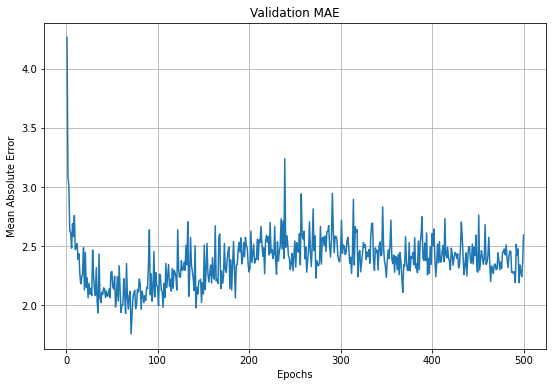

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_boston.history['val_mae']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_boston.history['val_mae'])
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

- 5번째 이후 MAE 확인

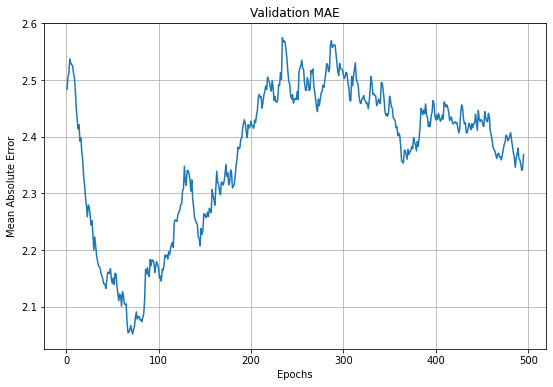

In [25]:
def smooth_curve(points, factor = 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

mae_history = Hist_boston.history['val_mae']

mae_history = smooth_curve(mae_history[5:])

plt.figure(figsize = (9, 6))
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.title('Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.grid()
plt.show()

In [26]:
# session 초기화

from tensorflow.keras import backend as K

K.clear_session()

# **Early Stopping**

In [27]:
from tensorflow.keras import models
from tensorflow.keras import layers

boston = models.Sequential(name = 'EarlyStopping')
boston.add(layers.Dense(64, activation = 'relu', input_shape = (13, )))
boston.add(layers.Dense(64, activation = 'relu'))
boston.add(layers.Dense(1))

boston.compile(loss = 'mse',
               optimizer = 'rmsprop',
               metrics = ['mae'])

## EerlyStopping()

- monitor : 모니터링 대상 성능
- mode : 모니터링 대상을 최소화(min - mse, mae) 또는 최대화(max - accuracy)
- patience : 성능이 개선되지 않는 epoch 횟수

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor = 'val_mae',
                   mode = 'min',
                   patience = 50,
                   verbose = 1)

## ModelCheckpoint()

- 'best_boston.h5' : 최적 모델이 저장될 경로
- save_best_only : 최적 모델만 저장할지 지정

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_boston.h5',
                     monitor = 'val_mae',
                     mode = 'min',
                     save_best_only = True,
                     verbose = 1)

## Model Fit with callbacks

- callbacks : EarlyStopping()과 ModelCheckpoint() 객체 지정

In [30]:
%%time

Hist_boston = boston.fit(X_train, y_train,
                         epochs = 500,
                         batch_size = 1,
                         validation_data = (X_valid, y_valid),
                         callbacks = [es, mc],
                         verbose = 1)

Epoch 1/500
323/323 [==============================] - 1s 2ms/step - loss: 176.2973 - mae: 9.3005 - val_loss: 42.8396 - val_mae: 3.7267

Epoch 00001: val_mae improved from inf to 3.72671, saving model to best_boston.h5
Epoch 2/500
323/323 [==============================] - 1s 2ms/step - loss: 21.5944 - mae: 3.2389 - val_loss: 25.0792 - val_mae: 2.9649

Epoch 00002: val_mae improved from 3.72671 to 2.96489, saving model to best_boston.h5
Epoch 3/500
323/323 [==============================] - 1s 2ms/step - loss: 17.4182 - mae: 2.8234 - val_loss: 23.2042 - val_mae: 3.1753

Epoch 00003: val_mae did not improve from 2.96489
Epoch 4/500
323/323 [==============================] - 1s 2ms/step - loss: 15.9536 - mae: 2.6818 - val_loss: 20.8553 - val_mae: 2.5663

Epoch 00004: val_mae improved from 2.96489 to 2.56630, saving model to best_boston.h5
Epoch 5/500
323/323 [==============================] - 1s 2ms/step - loss: 14.2614 - mae: 2.5514 - val_loss: 19.9818 - val_mae: 2.6889

Epoch 00005: va

In [31]:
!ls -l

total 76
-rw-r--r-- 1 root root 70280 Aug  5 17:18 best_boston.h5
drwxr-xr-x 1 root root  4096 Jul 16 13:20 sample_data


In [32]:
test_mse_score, test_mae_score = boston.evaluate(X_test, y_test)

print('MAE is : ', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 14.5766 - mae: 2.2811
MAE is :  2.2810893058776855
